In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
df = pd.read_csv('Datasets/titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Gender            0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [7]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df.drop(columns=['Name'], inplace=True)
df.drop(columns=['Ticket'], inplace=True)
df['Gender'] = df['Gender'].map({'male':1,'female':0})
df['Fare'].fillna(df['Fare'].mode()[0], inplace=True)

/tmp/ipykernel_10727/3025867133.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_10727/3025867133.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [8]:
df.head()

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Gender         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [10]:
df['FamilySize'] = df['SibSp']+df['Parch']+1
df['IsAlone'] = 1
df['IsAlone'].loc[df['FamilySize']>1] = 0

/tmp/ipykernel_10727/1965586414.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['IsAlone'].loc[df['FamilySize']>1] = 0
/tmp/ipykernel_10727/1965586414.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [11]:
df.head()

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,1,22.0,1,0,7.2500,S,2,0
1,2,1,1,0,38.0,1,0,71.2833,C,2,0
2,3,1,3,0,26.0,0,0,7.9250,S,1,1
3,4,1,1,0,35.0,1,0,53.1000,S,2,0
4,5,0,3,1,35.0,0,0,8.0500,S,1,1


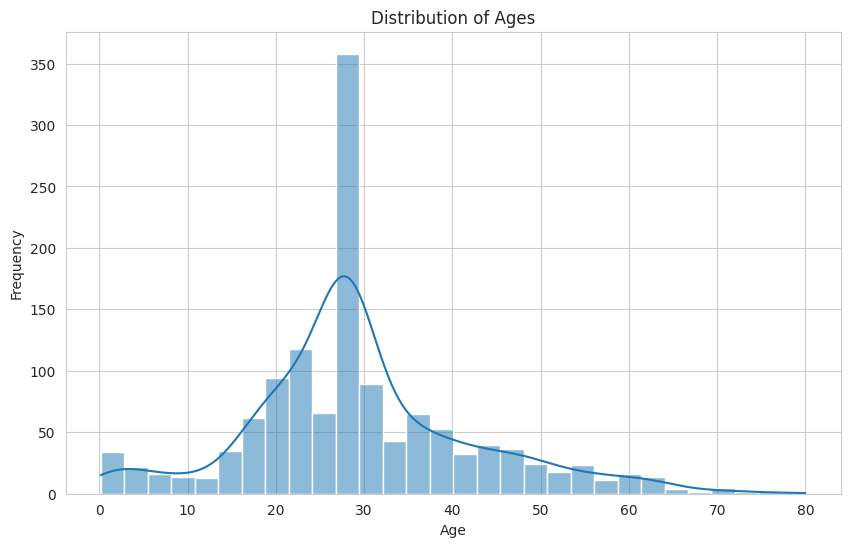

In [12]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")
# Plot the distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

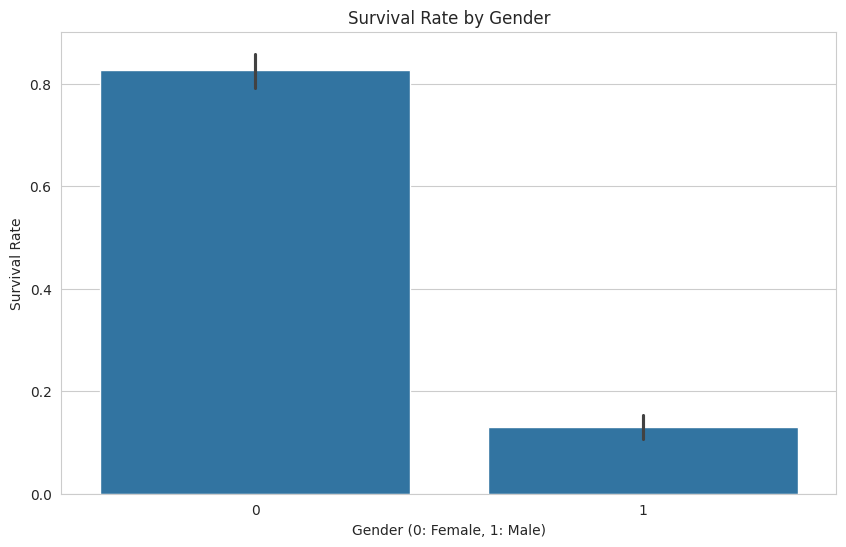

In [13]:
# Plot the survival rate by Gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Survival Rate')
plt.show()

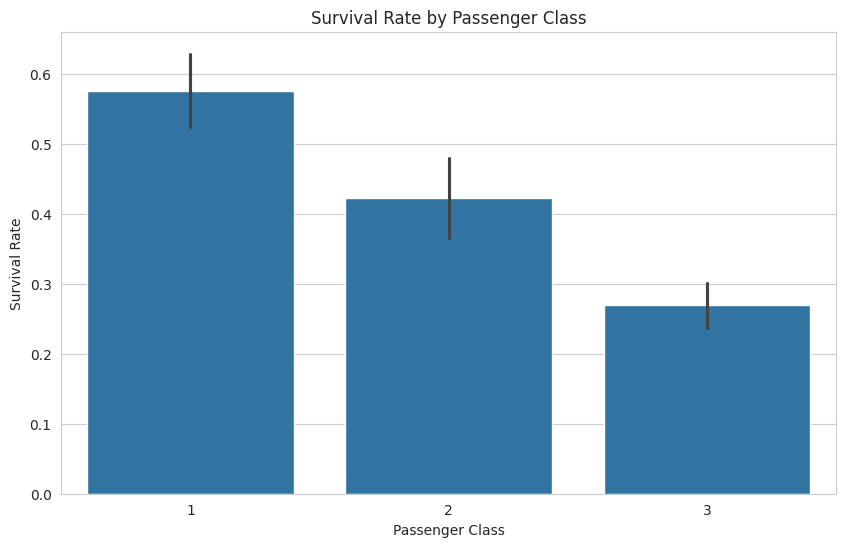

In [14]:
# Survival Rate by Passenger Class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

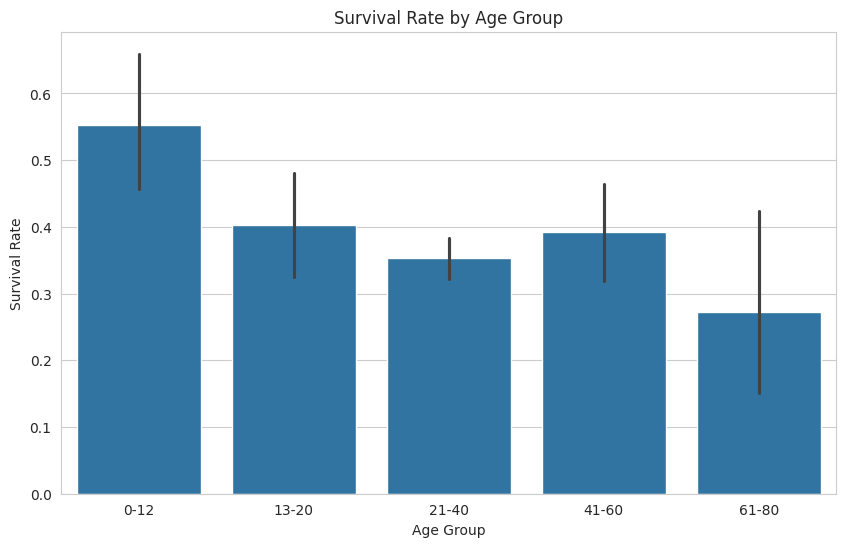

In [15]:
# Survival Rate by Age Group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80],
labels=['0-12', '13-20', '21-40', '41-60', '61-80'])
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

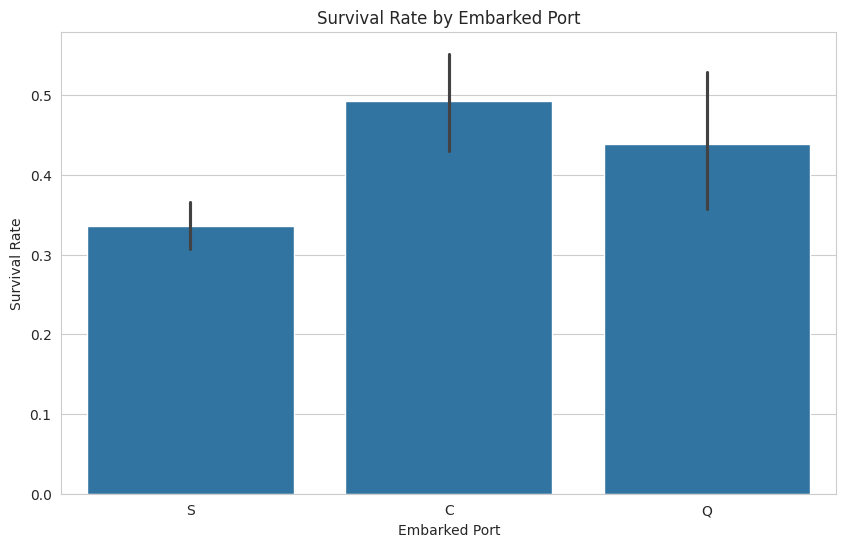

In [16]:
# Survival Rate by Embarked Port
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Survival Rate')
plt.show()

In [17]:
df['AgeGroup'] = df['AgeGroup'].astype('category').cat.codes
df['Embarked'] = df['Embarked'].astype('category').cat.codes

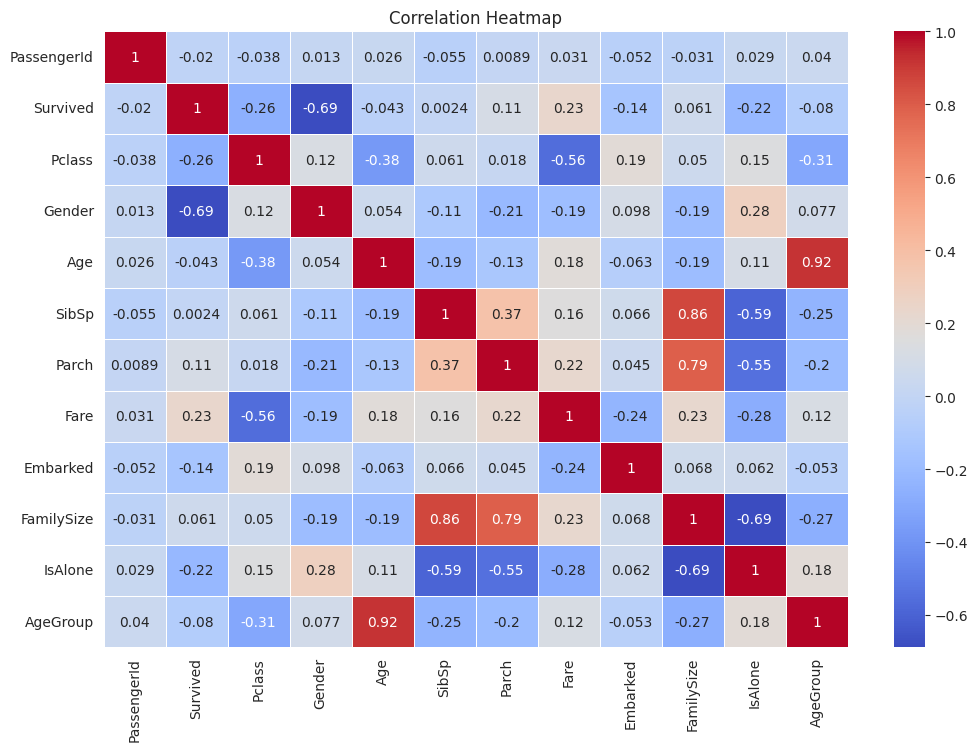

In [18]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

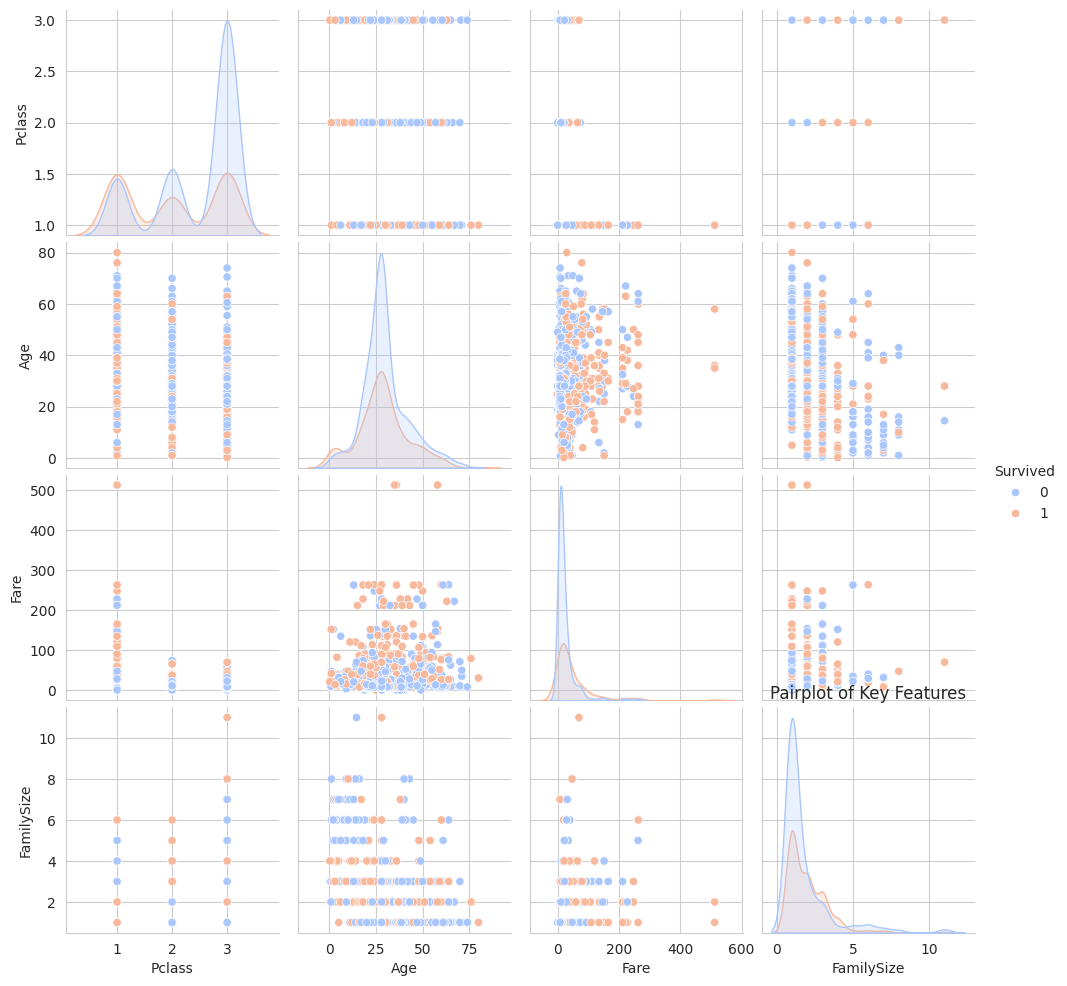

In [19]:
# Pairplot of Key Features
sns.pairplot(df[['Pclass', 'Age', 'Fare', 'FamilySize', 'Survived']],
hue='Survived', palette='coolwarm')
plt.title('Pairplot of Key Features')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select features and target
features = ['Pclass', 'Gender', 'Age', 'Fare', 'Embarked',
'FamilySize', 'IsAlone']
X = df[features]
y = df['Survived']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
X_train.shape, y_train.shape
((1047, 7), (1047,))
X_test.shape, y_test.shape
((262, 7), (262,))
# Normalize
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_normalized, y_train)
RandomForestClassifier(random_state=42)
# Predict on test set
y_pred = model.predict(X_test_normalized)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       159
           1       0.76      0.79      0.78       103

    accuracy                           0.82       262
   macro avg       0.81      0.81      0.81       262
weighted avg       0.82      0.82      0.82       262



<Figure size 1000x700 with 0 Axes>

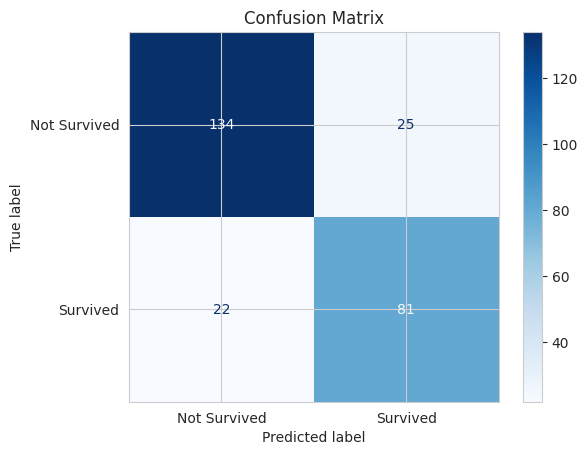

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Not Survived',
'Survived'])
# Plot confusion matrix
plt.figure(figsize=(10, 7))
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

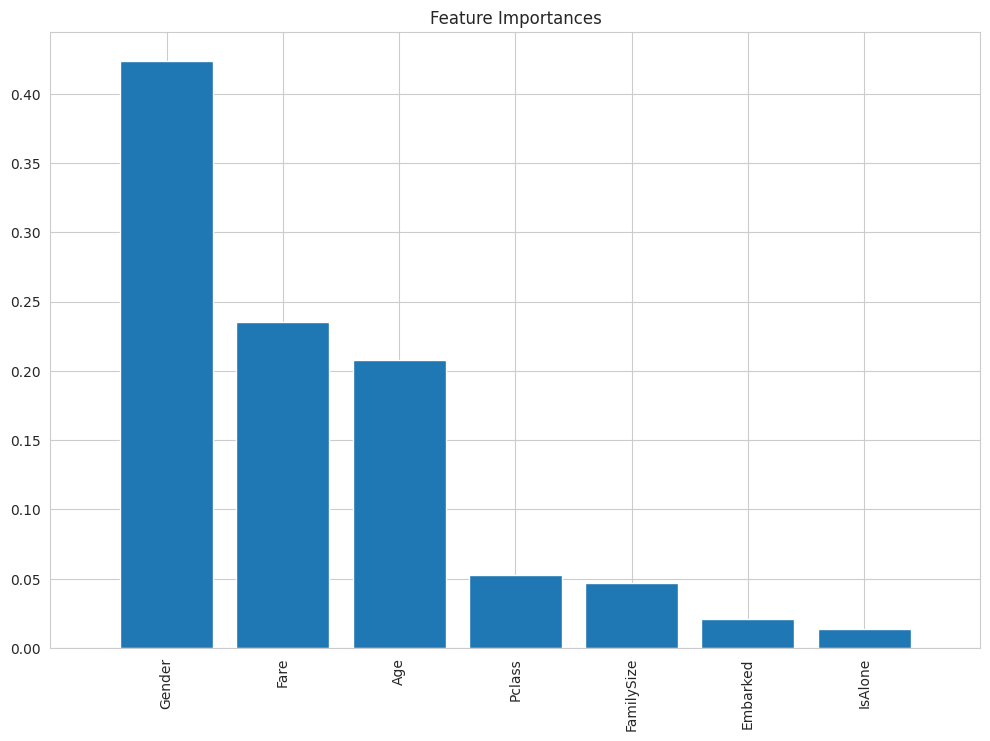

In [23]:
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()